In [1]:
url = "https://drive.google.com/uc?export=download&id=1tqPWmOoKq5qhnYshWfhfn4v6o_9Fe8Z1"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing dataset
df = pd.read_csv(url, sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# print the columns(feature variables) of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# distinguish categorical and numerical columns
categorical = ['job', 'marital', 'education', 'default', 
               'housing', 'loan', 'contact', 'month', 'poutcome']

numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [7]:
# To check the data types of each column
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
# to check total missing values each column
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# drop such rows that have entry as unknown
for feature in categorical :
    df = df[df[feature] != 'unknown']

len(df)

7842

In [10]:
# replace values(yes or no) in y column(to 0 or 1) for better analysis 
df['y'] = df['y'].replace({'no':0, 'yes':1})

<AxesSubplot:ylabel='y'>

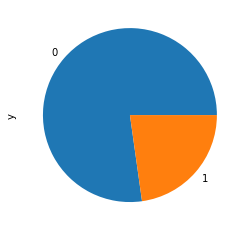

In [11]:
# plot a pie chart to check classes in target column
df.y.value_counts().plot.pie()

management       1753
blue-collar      1537
technician       1289
admin.           1057
services          682
retired           458
self-employed     264
student           237
entrepreneur      211
unemployed        208
housemaid         146
Name: job, dtype: int64

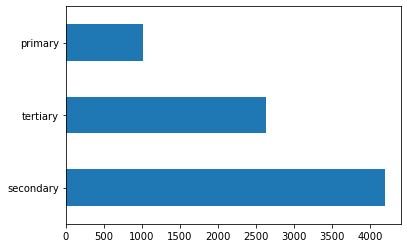

In [13]:
# plot the bar graph for count of categories in Education column 
df['education'].value_counts().plot.barh()
plt.show()

In [14]:
# If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc. Check using Balance column
df.balance.describe()

count     7842.000000
mean      1552.343280
std       3084.580003
min      -1884.000000
25%        162.000000
50%        595.000000
75%       1733.750000
max      81204.000000
Name: balance, dtype: float64

In [16]:
# Check the count distribution of target_variables accross poutcome
df.groupby(['poutcome'])['y'].value_counts()

poutcome  y
failure   0    4095
          1     584
other     0    1462
          1     288
success   1     914
          0     499
Name: y, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


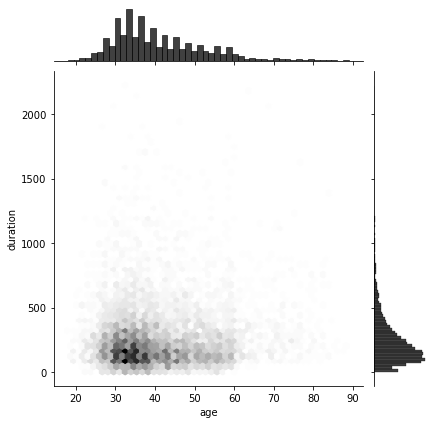

In [18]:
# joint plot of age and duration
sns.jointplot('age', 'duration', df, kind='hex', color='k')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


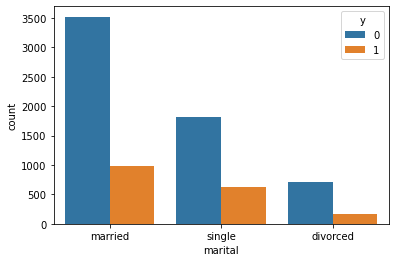

In [20]:
# show countplot for marital status column with respect to target variable categories
sns.countplot(df['marital'], hue=df['y'])
plt.show()

What is a Box Plot?

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. 

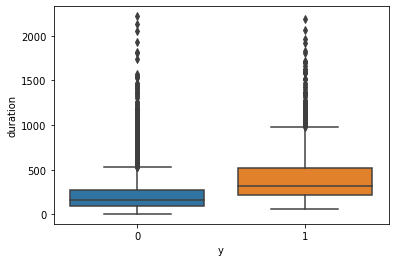

In [21]:
# create a box plot for call duration vs target_variable
sns.boxplot(y = df.duration, x = df.y)
plt.show()

Successful marketing have a higher median and quartile ranges of the duration of call. 

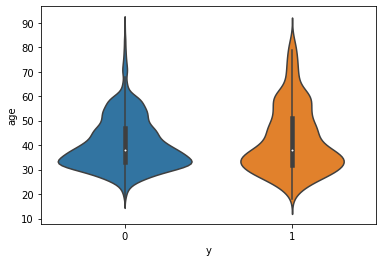

In [22]:
# create a violin plot for AGE vs target variable
sns.violinplot(x = df.y, y = df.age)
plt.show()

more middle age(25-50) people tend to show lack of interest

job          admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                               
primary    0.131579     0.083779      0.045455   0.240741    0.190476   
secondary  0.222607     0.125133      0.178571   0.175439    0.163934   
tertiary   0.276316     0.242424      0.085714   0.257143    0.297775   

job         retired  self-employed  services   student  technician  unemployed  
education                                                                       
primary    0.422360       0.066667  0.150943  0.411765    0.178571    0.428571  
secondary  0.408654       0.132530  0.160202  0.449367    0.183651    0.359375  
tertiary   0.438202       0.313253  0.222222  0.419355    0.277174    0.440678  



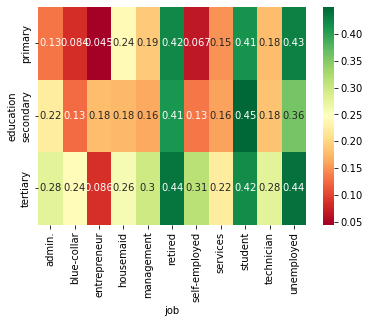

In [24]:
# create pivot table of education vs job vs target_variable
result = pd.pivot_table(data=df, index='education',
                       columns='job', values='y')
print(result)
print()

# create heat map for the same
sns.heatmap(result, annot=True, cmap='RdYlGn')
plt.show()

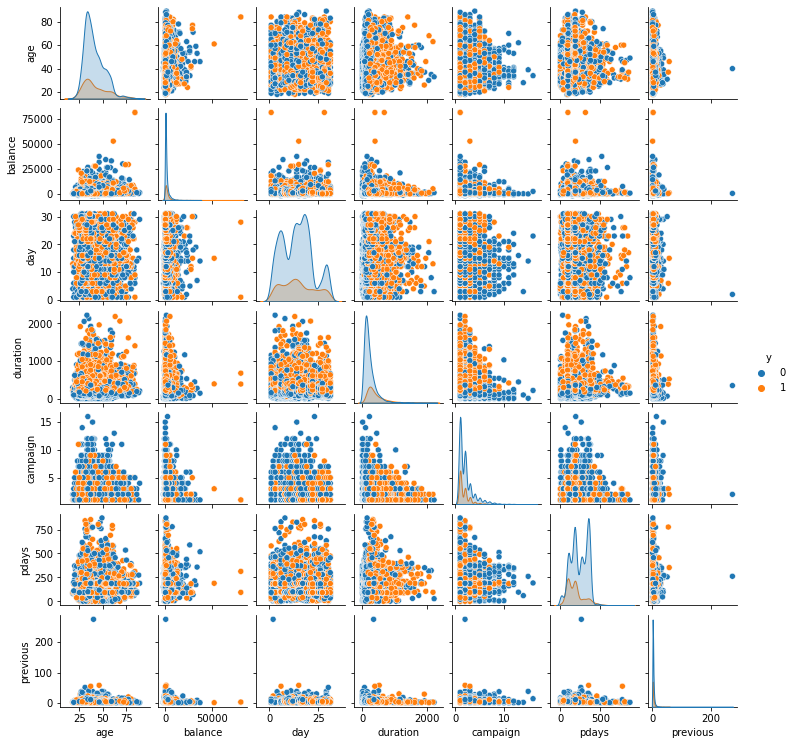

In [25]:
# create a pairplot with the target variable as a class for segmentation
sns.pairplot(df, hue='y', height=1.5)
plt.show()

In [26]:
# create dummies for categorical variables for train and test data
df_dummies = pd.get_dummies(df[categorical])

# concat the created dummies and drop those categorical columns
encoded_df = pd.concat([df, df_dummies], axis=1)
encoded_df.drop(categorical, axis=1, inplace=True)
encoded_df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
24060,33,882,21,39,1,151,3,0,1,0,...,0,0,0,0,0,1,0,1,0,0
24062,42,-247,21,519,1,166,1,1,1,0,...,0,0,0,0,0,1,0,0,1,0
24064,33,3444,21,144,1,91,4,1,0,0,...,0,0,0,0,0,1,0,1,0,0
24072,36,2415,22,73,1,86,4,0,0,0,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,23,140,1,143,3,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [27]:
# Creating X and Y
y = encoded_df['y']
X = encoded_df.drop(['y'], axis=1)
print(X.head())
print("======================================================")
print()

print(y.head())

       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
24060   33      882   21        39         1    151         3           1   
24062   42     -247   21       519         1    166         1           1   
24064   33     3444   21       144         1     91         4           0   
24072   36     2415   22        73         1     86         4           0   
24077   36        0   23       140         1    143         3           0   

       job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  \
24060                0                 0  ...          0          0   
24062                0                 0  ...          0          0   
24064                0                 0  ...          0          0   
24072                0                 0  ...          0          0   
24077                0                 0  ...          0          0   

       month_mar  month_may  month_nov  month_oct  month_sep  \
24060          0          0          0        

In [28]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=2)

In [29]:
# Initializing the Model 
from sklearn.tree import DecisionTreeClassifier
Classification_Tree = DecisionTreeClassifier()

In [30]:
# Fitting the training data
Classification_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Generating Predictions
y_test_prediction = Classification_Tree.predict(X_test)
y_test_prediction

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [33]:
# To check Classification model training accuracy using sklearn
from sklearn.metrics import accuracy_score
accuracy_score(Classification_Tree.predict(X_train), y_train)

1.0

In [34]:
# Check accuracy on test data
accuracy_score(Classification_Tree.predict(X_test), y_test)

0.7883732789393166

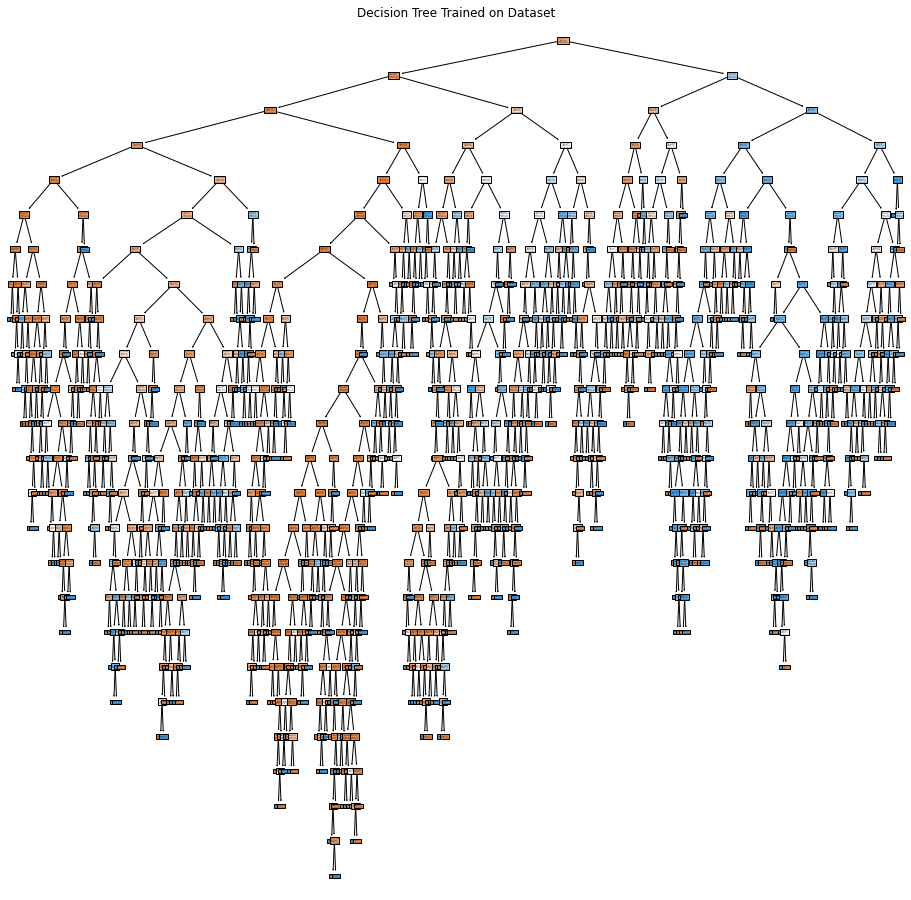

In [37]:
# use sklearn to plot tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(16, 16))
plot_tree(Classification_Tree, filled=True)
plt.title("Decision Tree Trained on Dataset")
plt.show()

In [39]:
!pip install hyperopt

In [40]:
# importing library for hyperparameter tuning 
import hyperopt
from hyperopt.pyll.base import scope

In [41]:
from hyperopt import tpe, hp, fmin, STATUS_OK, Trials

# Define Parameter Space for Optimization
space = {
    "max_depth" : hp.choice("max_depth", [i for i in range(1, 31)]),
    "criterion" : hp.choice("criterion", ['gini', 'entropy'])
}

In [42]:
# import KFold from sklearn model selection and prepare a function 
# for hyperparameter tuning for our hyperopt search space

from sklearn.model_selection import KFold

def hyperparameter_tuning(params) :
    clf = DecisionTreeClassifier(**params)
    k = 5
    kf = KFold(n_splits=k, random_state=None)
    acc_score = []
    for train_index, test_index in kf.split(X_train):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        clf.fit(X_train_kf, y_train_kf)
        pred_values = clf.predict(X_test_kf)
        acc = accuracy_score(pred_values, y_test_kf)
        acc_score.append(acc)
    
    avg_acc_score = sum(acc_score)/k

    return {"loss": -avg_acc_score, "status": STATUS_OK}  

In [43]:
# Initialize trials object for fitting the optimizer
trails = Trials()

best = fmin(
    fn = hyperparameter_tuning,
    space = space,
    algo = tpe.suggest,
    max_evals = 100,
    trials = trails
)

print("Best : {}".format(best))

100%|█████████████████████████████████████████████| 100/100 [00:20<00:00,  4.96trial/s, best loss: -0.8408423352348586]
Best : {'criterion': 1, 'max_depth': 1}


In [44]:
# print the results for trials
trails.results

[{'loss': -0.8403327091244315, 'status': 'ok'},
 {'loss': -0.8406729896716547, 'status': 'ok'},
 {'loss': -0.8245189834642439, 'status': 'ok'},
 {'loss': -0.8017337691236222, 'status': 'ok'},
 {'loss': -0.8309794011062369, 'status': 'ok'},
 {'loss': -0.8280896895716655, 'status': 'ok'},
 {'loss': -0.8032651038325269, 'status': 'ok'},
 {'loss': -0.8408423352348586, 'status': 'ok'},
 {'loss': -0.802582664331663, 'status': 'ok'},
 {'loss': -0.8250284650818696, 'status': 'ok'},
 {'loss': -0.8073452915575746, 'status': 'ok'},
 {'loss': -0.8046236251509951, 'status': 'ok'},
 {'loss': -0.8061548153670983, 'status': 'ok'},
 {'loss': -0.8177185742606303, 'status': 'ok'},
 {'loss': -0.8364212889913825, 'status': 'ok'},
 {'loss': -0.8046234806581936, 'status': 'ok'},
 {'loss': -0.8326796478999416, 'status': 'ok'},
 {'loss': -0.8070045775319473, 'status': 'ok'},
 {'loss': -0.8085347562984412, 'status': 'ok'},
 {'loss': -0.8105755726249718, 'status': 'ok'},
 {'loss': -0.8408423352348586, 'status': 

In [45]:
# print just losses for trials
trails.losses()

[-0.8403327091244315,
 -0.8406729896716547,
 -0.8245189834642439,
 -0.8017337691236222,
 -0.8309794011062369,
 -0.8280896895716655,
 -0.8032651038325269,
 -0.8408423352348586,
 -0.802582664331663,
 -0.8250284650818696,
 -0.8073452915575746,
 -0.8046236251509951,
 -0.8061548153670983,
 -0.8177185742606303,
 -0.8364212889913825,
 -0.8046234806581936,
 -0.8326796478999416,
 -0.8070045775319473,
 -0.8085347562984412,
 -0.8105755726249718,
 -0.8408423352348586,
 -0.8408423352348586,
 -0.8408423352348586,
 -0.8178873418526289,
 -0.8336999115704055,
 -0.8347211866904791,
 -0.8308094775718274,
 -0.8110854877210016,
 -0.8083638213144221,
 -0.8025832423028684,
 -0.807853472739988,
 -0.8083639658072235,
 -0.8088753258312671,
 -0.8029232338644888,
 -0.799692663811489,
 -0.8049644836694236,
 -0.8408423352348586,
 -0.806664585970327,
 -0.8398219270715932,
 -0.8406729896716547,
 -0.8122753859402725,
 -0.8245189834642439,
 -0.8034344493957312,
 -0.8408423352348586,
 -0.8032627919477052,
 -0.8047939821

In [46]:
# print just statuses for trials
trails.statuses()

['ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok']

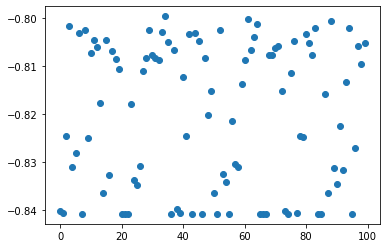

In [47]:
# plot to check accuracies given in the trials
plt.scatter([i for i in range(len(trails.losses()))], trails.losses())

In [48]:
# build new model for chosen parameters
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [49]:
# train accuracy
accuracy_score(clf.predict(X_train), y_train)

0.8413535113076007

In [50]:
# test accuracy
accuracy_score(clf.predict(X_test), y_test)

0.8403875573686894

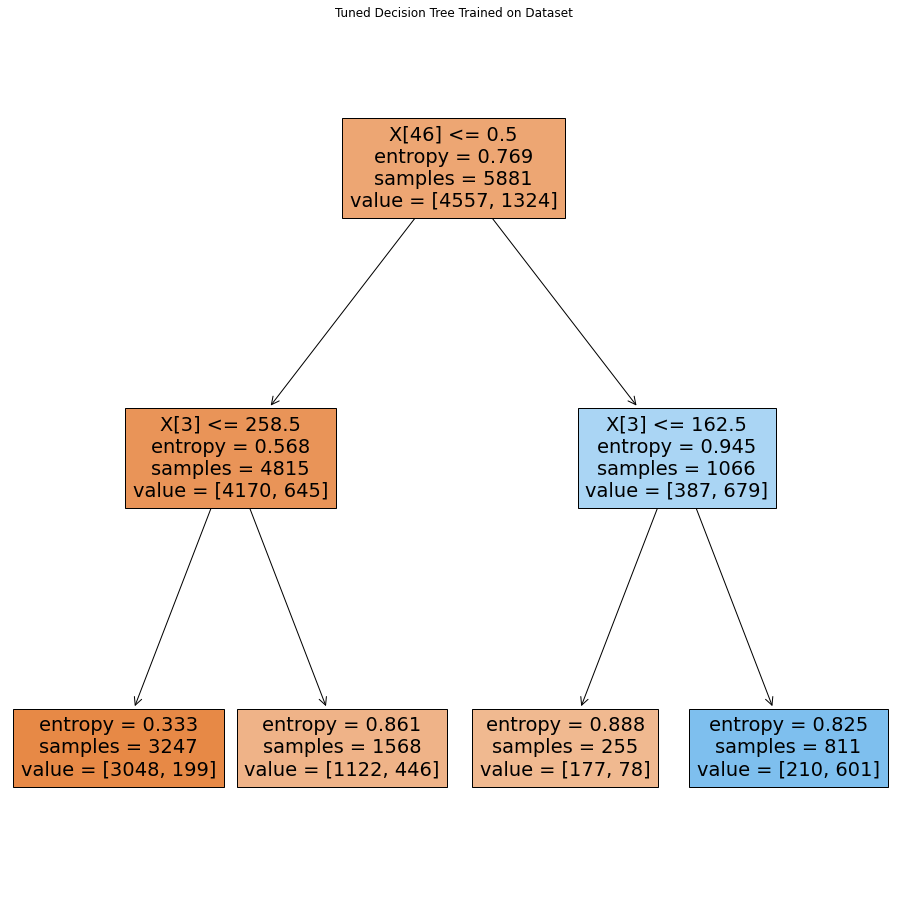

In [51]:
# plot the tuned clf classifier tree 
fig = plt.figure(figsize=(16, 16))

plot_tree(clf, filled=True)
plt.title("Tuned Decision Tree Trained on Dataset")
plt.show()